In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/Users/rajpetlu/anaconda3/envs/py312/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


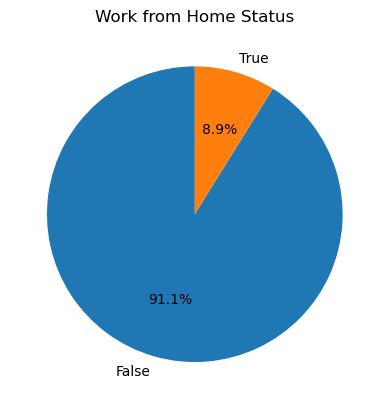

In [13]:
df['job_work_from_home'].value_counts().plot(kind = 'pie', startangle = 90, autopct = '%1.1f%%')
plt.title('Work from Home Status')
plt.ylabel('')
plt.show()

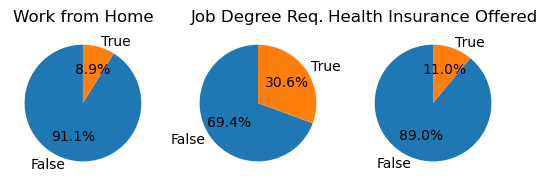

In [19]:
fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered' 
}

for i, (column, title) in enumerate(dict_column.items()):   
    ax[i].pie(df[column].value_counts(), startangle=90, autopct = '%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.show()